In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

     
import utils.paths as path

# Nota 
Estos modelos son muy básicos y no tienen el respaldo matematico apropiado para dar un resultado
optimo, hice la creación sencilla para ayudar a explicar un poco más mi trabajo. por lo tanto opté por eliminar partes en donde se calculan los parametros adecuados de los modelos. 

In [118]:
data_dir = path.make_dir_function("data")

In [119]:
df = pd.read_csv(data_dir("processed","df_forcluster.csv"))

In [120]:
df_transformed = df.copy()

## Transformacion de datos 

In [121]:
columns_to_transform = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
df_transformed['Fruits'] = df_transformed['Fruits'].apply(lambda x: np.tanh(x/15))
df_transformed['Meat'] = df_transformed['Meat'].apply(lambda x: np.tanh(x/150))
df_transformed['Wines'] = df_transformed['Wines'].apply(lambda x: np.tanh(x/300))
df_transformed['Gold'] = df_transformed['Gold'].apply(lambda x: np.tanh(x/65))
df_transformed['Sweets'] = df_transformed['Sweets'].apply(lambda x: np.tanh(x/19.5))
df_transformed['Fish'] = df_transformed['Fish'].apply(lambda x: np.tanh(x/12))
df_transformed = pd.get_dummies(df_transformed,columns=['Marital_Status','Education'],drop_first=True)

## Escalamiento de datos para modelo cluster

In [122]:
scaler = StandardScaler()

In [123]:
df_scaled = scaler.fit_transform(df_transformed)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df_transformed.columns

## PCA para los datos 

In [124]:
pca = PCA()
pca.fit(df_scaled)
df_pca_scaled = pca.transform(df_scaled)
df_pca_standard = pd.DataFrame(df_pca_scaled)
     

# Cluster kmeans 

In [125]:
suma_cuadrados = []
sil_score = []
k = range(2,18)
for i in k:
    kmeans = KMeans(n_clusters=i,n_init=10)
    y = kmeans.fit_predict(df_pca_standard)
    suma_cuadrados.append(kmeans.inertia_)
    sil_score.append(silhouette_score(df_pca_standard,y))

In [126]:
kmeans = KMeans(n_clusters=3,n_init=10)
y= kmeans.fit_predict(df_pca_standard)
print(silhouette_score(df_pca_standard,y))
df['segmentacion'] = y

0.14491834885727023


## Graficas con el resultado del modelo de cluster kmeans

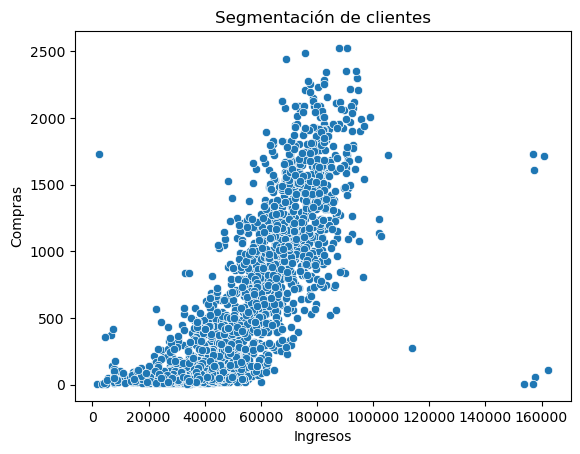

In [127]:
sns.scatterplot(data=df,x='Income',y='Spent')
plt.title("Segmentación de clientes")
plt.xlabel('Ingresos')
plt.ylabel('Compras')
plt.show()

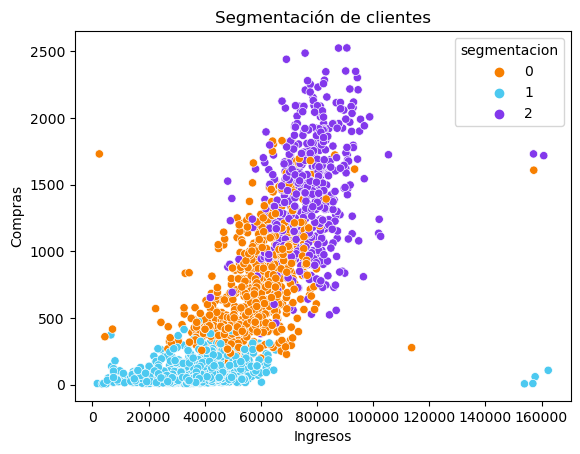

In [128]:
sns.scatterplot(data=df,x='Income',y='Spent',hue='segmentacion',palette=['#f77f00','#4cc9f0','#8338ec'])
plt.title("Segmentación de clientes")
plt.xlabel('Ingresos')
plt.ylabel('Compras')
plt.show()

Text(0, 0.5, 'Compras')

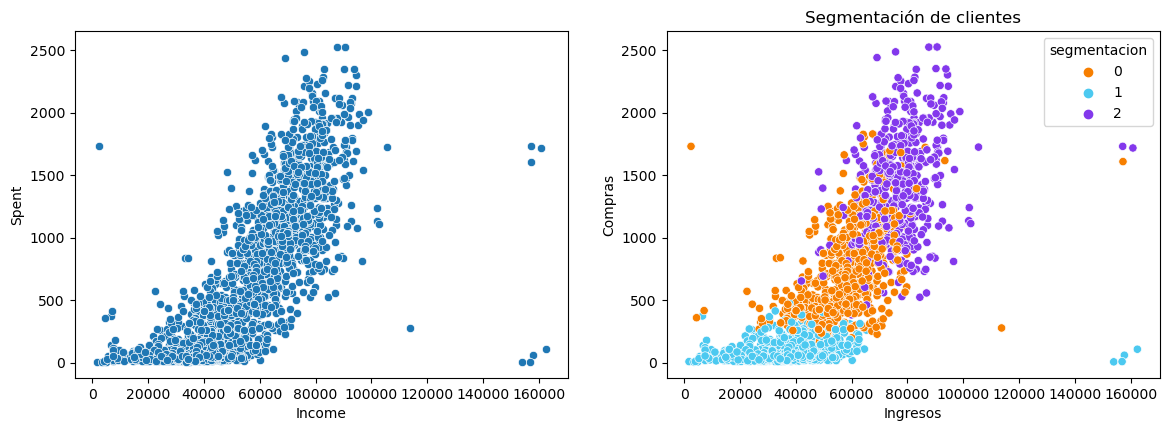

In [143]:
fig, axs = plt.subplots(1,2,figsize=(14,4.5))

sns.scatterplot(ax=axs[0],data=df,x='Income',y='Spent')
plt.title("Segmentación de clientes")
plt.xlabel('Ingresos')
plt.ylabel('Compras')


sns.scatterplot(ax=axs[1],data=df,x='Income',y='Spent',hue='segmentacion',palette=['#f77f00','#4cc9f0','#8338ec'])
plt.title("Segmentación de clientes")
plt.xlabel('Ingresos')
plt.ylabel('Compras')




## Modelo supervisado regresión lineal

In [130]:
rl = pd.DataFrame({
    "habitaciones":[2,3,2,3,4,2,1,5,2,3,2,3,4,2,1,5],
    "precio":[600,750,580,720,800,620,300,950,500,650,480,620,700,520,200,850]
})

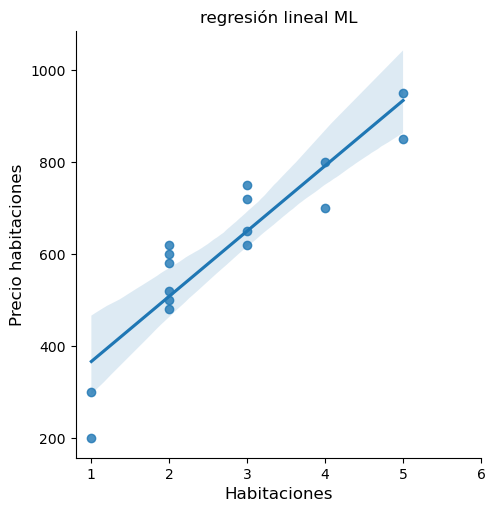

In [131]:
sns.lmplot(data=rl,x="habitaciones",y="precio")
plt.xticks([1,2,3,4,5,6])
plt.title('regresión lineal ML',fontsize=12)
plt.xlabel("Habitaciones",fontsize=12)
plt.ylabel("Precio habitaciones",fontsize=12)
plt.show()